In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import seaborn as sns
import os

/home/vinicius-lavor/Área de trabalho/Disciplina-ICA/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = kagglehub.dataset_download("vinayakshanawad/heart-rate-prediction-to-monitor-stress-level")

In [3]:
print(path)

/home/vinicius-lavor/.cache/kagglehub/datasets/vinayakshanawad/heart-rate-prediction-to-monitor-stress-level/versions/1


In [4]:
train_path = path + "/Train Data/Train Data Zip"
test_path = path + "/Test Data/Test Zip"
def load_time_domain(folder): # carregar treino e teste e concatenar
    file = next((f for f in os.listdir(folder) if "time_domain" in f.lower() and f.endswith(".csv")), 
    None )
    
    if file is None:
        raise FileNotFoundError(f"Nenhum arquivo 'time_domain' encontrado em {folder}")
    
    
    df = pd.read_csv(os.path.join(folder, file))
    return df

In [5]:
train_csv = load_time_domain(train_path)
test_csv = load_time_domain(test_path)
df = pd.concat([train_csv, test_csv], axis=0).reset_index(drop=True)

In [6]:
df.head(10)

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,89df2855-56eb-4706-a23b-b39363dd605a
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,c2d5d102-967c-487d-88f2-8b005a449f3e
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,37eabc44-1349-4040-8896-0d113ad4811f
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7
5,923.283866,617.794160,517.536544,9.965976,9.933933,51.930344,81.342254,1.200000,0.600000,-0.893858,1.026302,0.000750,0.000210,0.011061,0.005987,0.005987,1.847605,-0.893858,1.026302,fe7b4ab0-42d3-48d0-8479-7b022d6af0bc
6,973.252908,964.650020,82.405179,10.644196,10.643638,7.741794,62.095066,2.000000,0.000000,-0.442670,0.102908,-0.000124,-0.000583,0.010997,0.004772,0.004772,2.304640,-0.442670,0.102908,d324b1ee-aaa1-4edb-9b46-c597cb0bbd8c
7,715.914682,679.499395,131.477151,9.477727,9.477717,13.872224,85.857703,2.533333,0.200000,5.224736,2.452996,0.000031,0.000038,0.013206,0.006843,0.006843,1.929994,5.224736,2.452996,cf272c21-98d8-45c1-9e2b-5ed1fe1864bd
8,814.257021,827.522830,87.014459,14.632232,14.631275,5.946766,74.588857,7.733333,0.800000,-0.455008,-0.371959,-0.000187,0.000714,0.018204,0.008242,0.008242,2.208637,-0.455008,-0.371959,c65dcfb0-1774-4a2a-aa45-271083faeeaa
9,959.694591,957.895600,54.904529,12.015400,12.015343,4.569513,62.726998,3.266667,0.200000,0.413338,-0.018134,0.000051,0.000020,0.012648,0.005719,0.005719,2.211739,0.413338,-0.018134,79977df1-0e09-4873-bb31-15581002200b


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410322 entries, 0 to 410321
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            410322 non-null  float64
 1   MEDIAN_RR          410322 non-null  float64
 2   SDRR               410322 non-null  float64
 3   RMSSD              410322 non-null  float64
 4   SDSD               410322 non-null  float64
 5   SDRR_RMSSD         410322 non-null  float64
 6   HR                 369289 non-null  float64
 7   pNN25              410322 non-null  float64
 8   pNN50              410322 non-null  float64
 9   KURT               410322 non-null  float64
 10  SKEW               410322 non-null  float64
 11  MEAN_REL_RR        410322 non-null  float64
 12  MEDIAN_REL_RR      410322 non-null  float64
 13  SDRR_REL_RR        410322 non-null  float64
 14  RMSSD_REL_RR       410322 non-null  float64
 15  SDSD_REL_RR        410322 non-null  float64
 16  SD

In [8]:
df.describe()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
count,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,369289.000000,410322.000000,410322.000000,410322.000000,410322.000000,4.103220e+05,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000
mean,846.670724,841.980595,109.302941,14.978707,14.977976,7.393869,73.941824,9.845863,0.865656,0.522984,0.041958,-1.583798e-06,-0.000465,0.018570,0.009700,0.009700,2.006945,0.522984,0.041958
std,124.585711,132.286414,77.065738,4.122602,4.122605,5.144097,10.337453,8.202293,0.989847,1.790502,0.699008,1.629276e-04,0.000867,0.005454,0.003896,0.003896,0.375986,1.790502,0.699008
min,547.483802,517.293295,27.233947,5.529742,5.529630,2.660381,48.737243,0.000000,0.000000,-1.894831,-2.136278,-1.275240e-03,-0.004425,0.008987,0.003220,0.003220,1.169342,-1.894831,-2.136278
25%,760.243974,755.749505,64.196632,11.831264,11.831056,4.539551,66.715776,3.666667,0.000000,-0.352751,-0.358584,-7.252892e-05,-0.000918,0.014259,0.006983,0.006983,1.749946,-0.352751,-0.358584
50%,822.916027,819.669975,82.624288,14.417202,14.416616,5.950217,74.217809,7.600000,0.466667,0.040685,-0.060275,-8.252218e-07,-0.000312,0.017317,0.008691,0.008691,1.934560,0.040685,-0.060275
75%,924.220881,917.009455,118.193410,17.931444,17.929922,7.918086,80.334937,13.333333,1.400000,0.721635,0.282764,6.921644e-05,0.000131,0.021828,0.011459,0.011459,2.221159,0.721635,0.282764
max,1322.016957,1653.122250,563.486949,26.629477,26.629392,54.523950,113.752309,39.400000,5.466667,64.088107,6.777800,1.244098e-03,0.002095,0.036575,0.026955,0.026955,3.724134,64.088107,6.777800


In [9]:
df.isna().sum() # checando valores NaN

MEAN_RR                  0
MEDIAN_RR                0
SDRR                     0
RMSSD                    0
SDSD                     0
SDRR_RMSSD               0
HR                   41033
pNN25                    0
pNN50                    0
KURT                     0
SKEW                     0
MEAN_REL_RR              0
MEDIAN_REL_RR            0
SDRR_REL_RR              0
RMSSD_REL_RR             0
SDSD_REL_RR              0
SDRR_RMSSD_REL_RR        0
KURT_REL_RR              0
SKEW_REL_RR              0
uuid                     0
dtype: int64

array([[<Axes: title={'center': 'MEAN_RR'}>,
        <Axes: title={'center': 'MEDIAN_RR'}>,
        <Axes: title={'center': 'SDRR'}>,
        <Axes: title={'center': 'RMSSD'}>],
       [<Axes: title={'center': 'SDSD'}>,
        <Axes: title={'center': 'SDRR_RMSSD'}>,
        <Axes: title={'center': 'HR'}>,
        <Axes: title={'center': 'pNN25'}>],
       [<Axes: title={'center': 'pNN50'}>,
        <Axes: title={'center': 'KURT'}>,
        <Axes: title={'center': 'SKEW'}>,
        <Axes: title={'center': 'MEAN_REL_RR'}>],
       [<Axes: title={'center': 'MEDIAN_REL_RR'}>,
        <Axes: title={'center': 'SDRR_REL_RR'}>,
        <Axes: title={'center': 'RMSSD_REL_RR'}>,
        <Axes: title={'center': 'SDSD_REL_RR'}>],
       [<Axes: title={'center': 'SDRR_RMSSD_REL_RR'}>,
        <Axes: title={'center': 'KURT_REL_RR'}>,
        <Axes: title={'center': 'SKEW_REL_RR'}>, <Axes: >]], dtype=object)

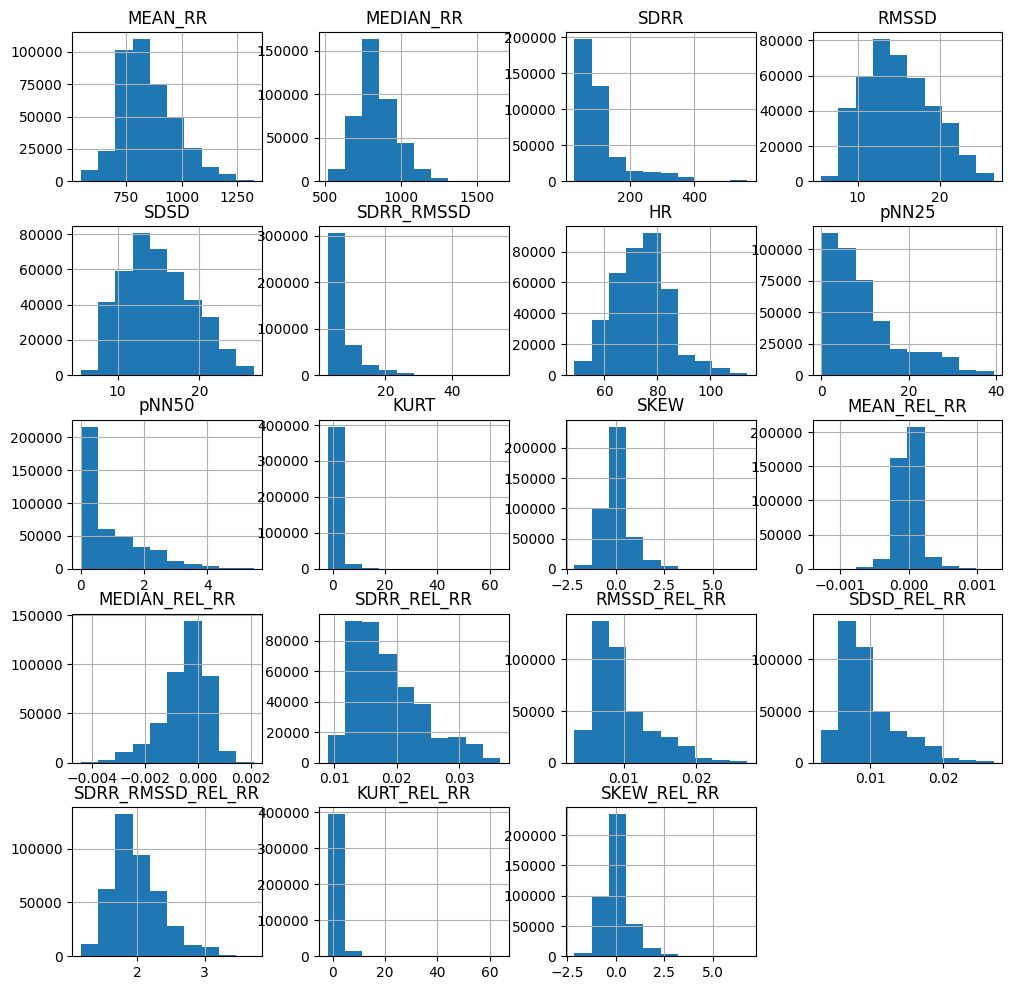

In [10]:
df.hist(figsize=(12,12))

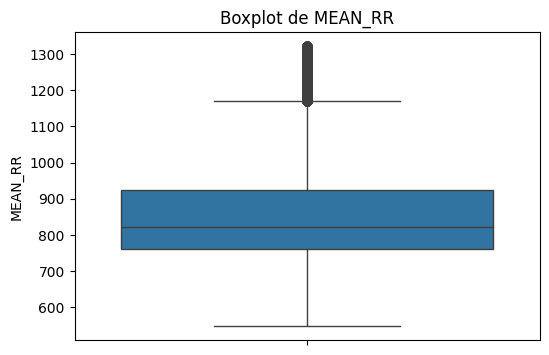

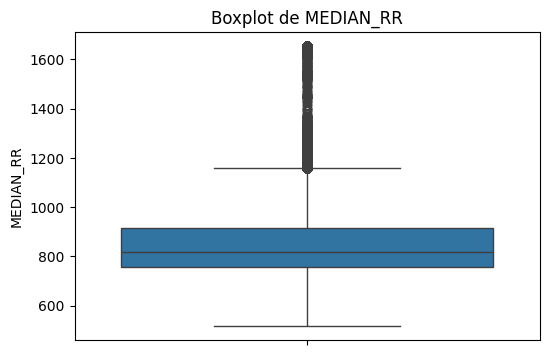

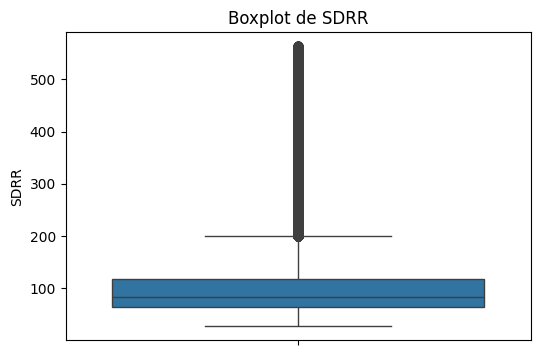

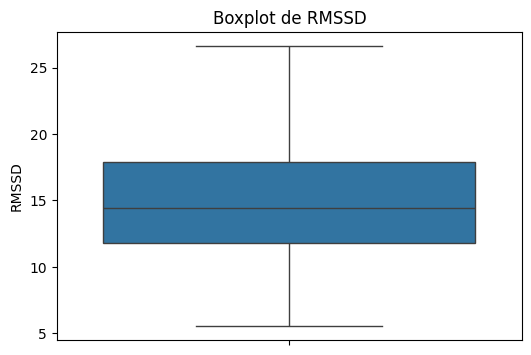

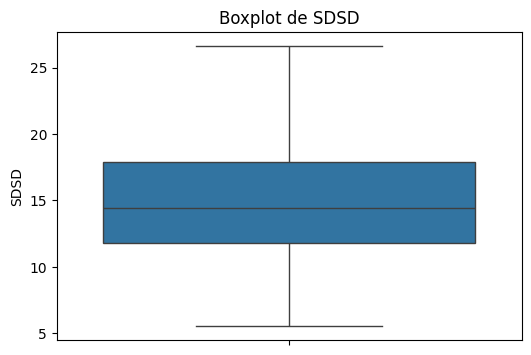

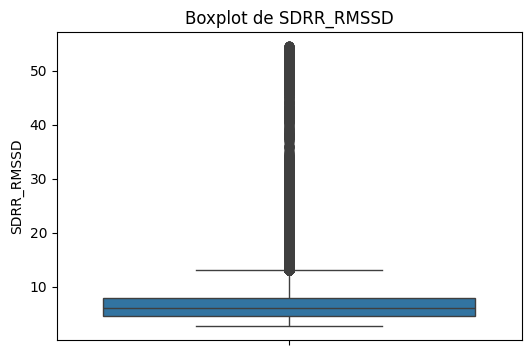

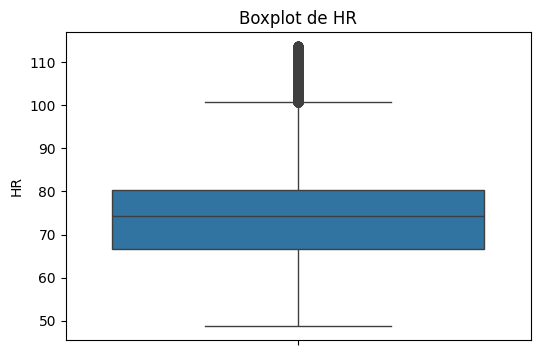

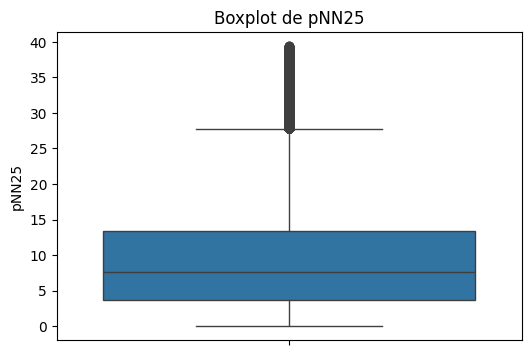

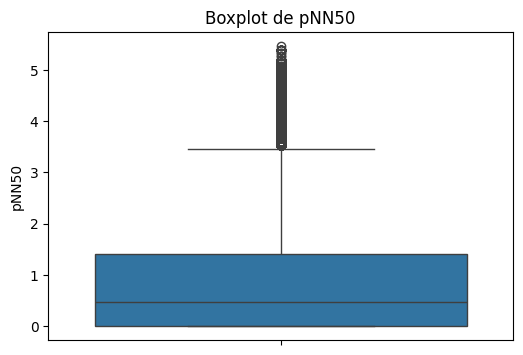

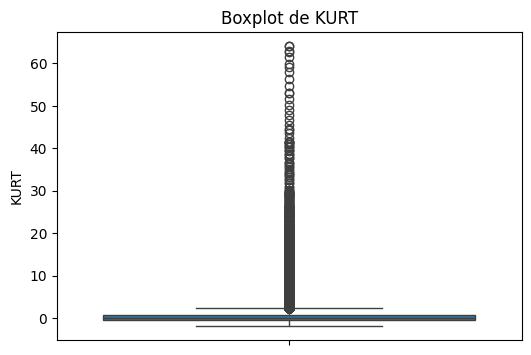

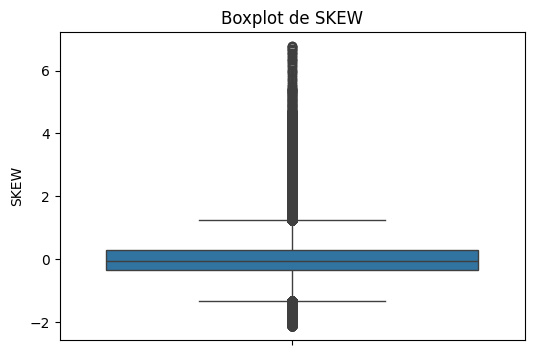

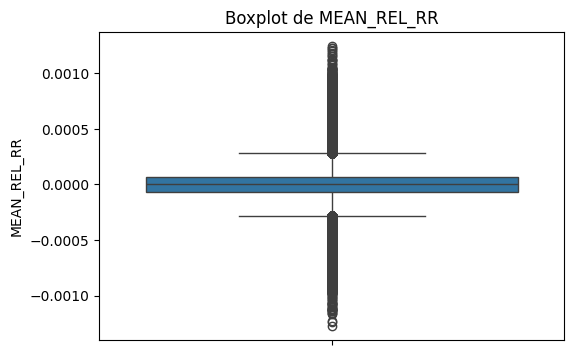

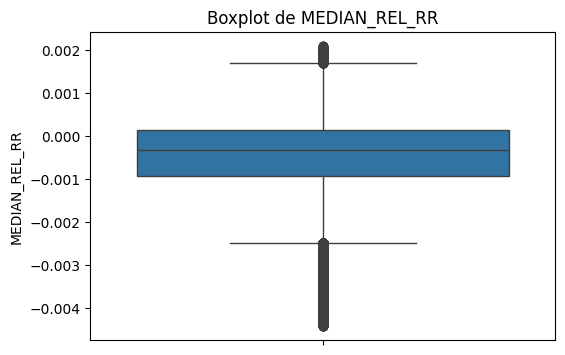

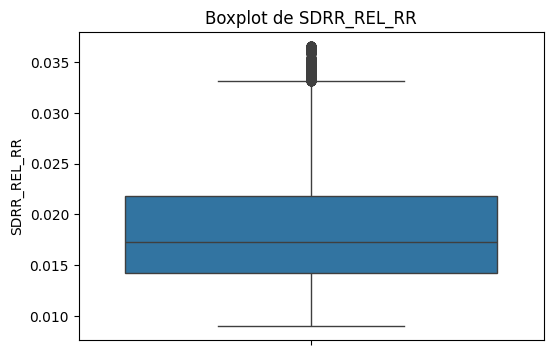

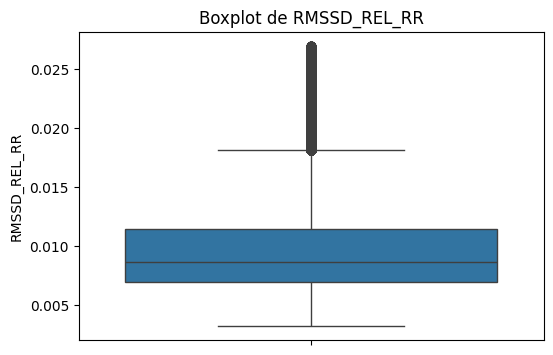

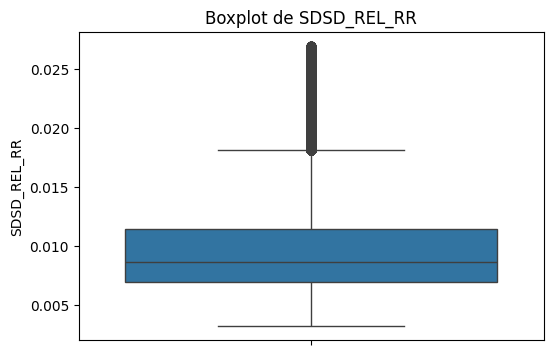

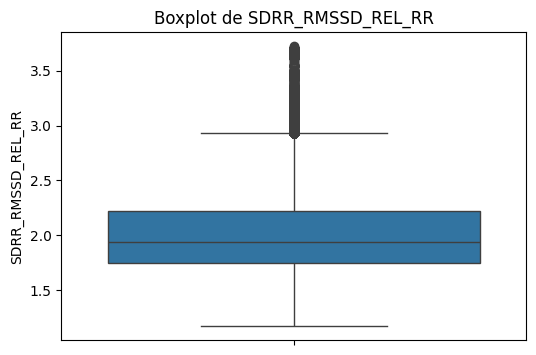

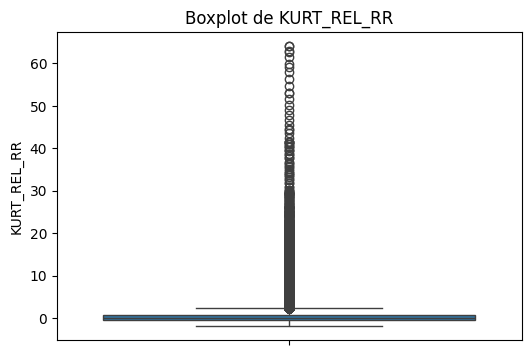

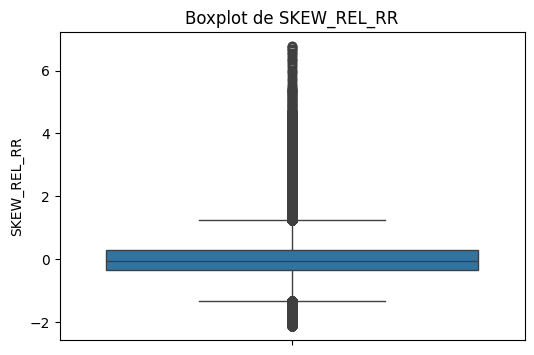

In [ ]:
for col in df.columns:
    plt.figure(figsize=(6,4))      
    sns.boxplot(y=df[col])          
    plt.title(f"Boxplot de {col}")
    plt.show()                      
